In [3]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
(966, 150)
(322, 150)


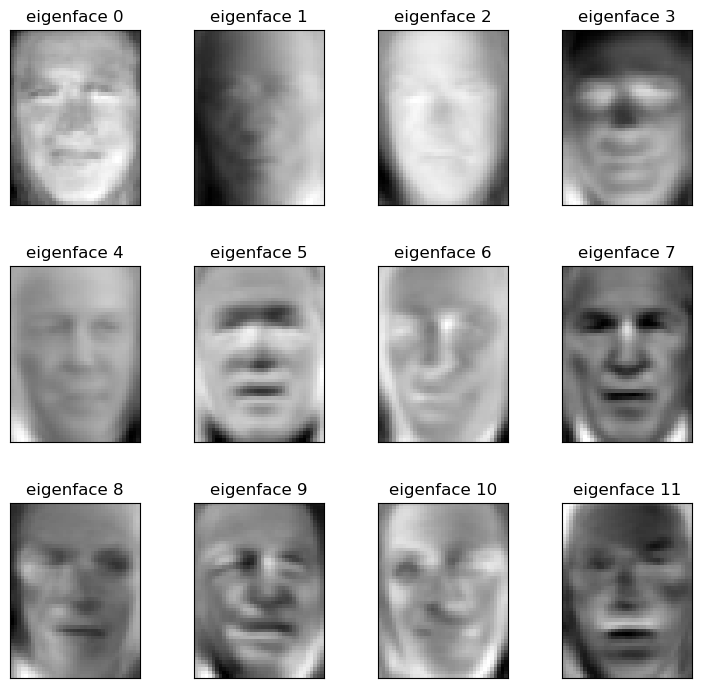

In [ ]:
# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Extract the meaningful parameters of the faces dataset
# Introspect the images arrays to find the shapes (for plotting)
# (1280, 50, 37) because we have 1280 images, each of size 50x37
n_samples, h, w = lfw_people.images.shape

# For machine learning we use the data directly (as relative pixel positions are ignored)
X = lfw_people.data
#flattened into 1d array later so we do this:
n_features = X.shape[1]

# The label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
#number of people in our idd array
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

# Split into a training set and a test set using a stratified k fold
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Compute a PCA (eigenfaces) on the face dataset: unsupervised feature extraction / dimensionality reduction
n_components = 150

# Center data because PCA assumes the data is centered. We have already satisfied the variance conditions of PCA
mean = np.mean(X_train, axis=0)
X_train -= mean
X_test -= mean

# Eigen-decomposition
# think x = faces, y = pixels in each face, and then we find the 
# v = areas/directions of maximum variance in face space
# s = importance of each vector
# U = the postion of eacch face

U, S, V = np.linalg.svd(X_train, full_matrices=False)
components = V[:n_components]
eigenfaces = components.reshape((n_components, h, w))

# Project into PCA subspace
X_transformed = np.dot(X_train, components.T)
print(X_transformed.shape)

X_test_transformed = np.dot(X_test, components.T)
print(X_test_transformed.shape)

# Plot the resulting eigenfaces
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#build random forest
estimator = RandomForestClassifier(n_estimators=150, max_depth=15, max_features=150)
estimator.fit(X_transformed, y_train) #expects X as [n_samples, n_features]
predictions = estimator.predict(X_test_transformed)
correct = predictions==y_test
total_test = len(X_test_transformed)
#print("Gnd Truth:", y_test)
print("Total Testing", total_test)
print("Predictions", predictions)
print("Which Correct:",correct)
print("Total Correct:",np.sum(correct))
print("Accuracy:",np.sum(correct)/total_test)
print(classification_report(y_test, predictions, target_names=target_names))

Total Testing 322
Predictions [3 3 6 3 4 3 3 1 3 3 3 3 3 3 3 3 4 3 3 4 1 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 1 3 1 1 3 3 3 4 3 3 3 3 3 3 2 1 3 5 3 6 1 3 4 3 5 3 4 1 3 6 6 3 3
 3 2 3 3 1 3 6 3 3 3 3 3 3 3 3 3 5 6 3 3 1 3 3 1 1 6 3 3 3 3 3 3 3 3 3 1 3
 1 6 3 3 3 3 4 1 3 1 3 3 1 3 4 5 3 1 3 6 6 3 3 3 4 3 3 6 1 3 3 3 1 3 3 3 3
 6 1 1 3 1 3 3 3 6 1 3 3 6 5 5 1 3 1 5 1 3 3 1 3 3 1 5 3 3 3 3 5 3 3 3 3 3
 3 3 3 3 2 3 3 2 3 6 3 3 3 3 3 3 3 3 3 5 1 4 2 6 2 1 5 3 3 4 3 3 1 3 3 3 3
 3 1 1 3 3 3 1 3 3 3 3 3 3 1 3 3 3 3 3 4 3 3 3 3 3 3 3 4 4 4 3 4 3 4 3 1 3
 3 3 3 3 1 3 5 6 1 6 1 6 3 3 3 6 3 3 3 3 3 1 1 3 3 3 1 3 3 3 4 3 3 5 3 3 1
 3 5 3 3 3 6 3 3 1 3 3 3 3 3 3 3 1 3 1 3 3 1 3 3 4 3]
Which Correct: [ True  True  True  True False  True False  True  True  True  True  True
  True False  True  True False  True  True  True  True False  True False
 False  True False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False  True
 False  T

c:\Users\jamed\miniconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\jamed\miniconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\jamed\miniconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.sh

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

# 1. Load LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

X = lfw_people.images  # shape: (n_samples, h, w)
Y = lfw_people.target
n_classes = len(lfw_people.target_names)

print("Dataset shape:", X.shape)
print("Number of classes:", n_classes)
print("Value range:", X.min(), "to", X.max())

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42, stratify=Y
)

# 3. Reshape for PyTorch: (N, C, H, W), it expect colours
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Wrap into Datasets & DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Dataset shape: (1288, 50, 37)
Number of classes: 7
Value range: 0.0 to 1.0


In [9]:
class LFW_CNN(nn.Module):
    def __init__(self, num_classes):
        super(LFW_CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()

        # We'll figure out the FC input size dynamically
        self.flatten = nn.Flatten()

        # Dummy forward pass to compute feature size
        dummy_input = torch.zeros(1, 1, X.shape[1], X.shape[2])
        with torch.no_grad():
            out = self._forward_features(dummy_input)
            n_features = out.shape[1]

        self.fc1 = nn.Linear(n_features, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def _forward_features(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.flatten(x)
        return x

    def forward(self, x):
        x = self._forward_features(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = LFW_CNN(num_classes=n_classes)
print(model)


LFW_CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3456, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=7, bias=True)
)


In [10]:
criterion = nn.CrossEntropyLoss()  # works with class indices
optimizer = optim.Adam(model.parameters(), lr=1e-3)


In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/10], Loss: 1.7200
Epoch [2/10], Loss: 1.6579
Epoch [3/10], Loss: 1.6209
Epoch [4/10], Loss: 1.5469
Epoch [5/10], Loss: 1.4006
Epoch [6/10], Loss: 1.2430
Epoch [7/10], Loss: 1.0436
Epoch [8/10], Loss: 0.9751
Epoch [9/10], Loss: 0.7953
Epoch [10/10], Loss: 0.6908


In [12]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 75.78%
